In [10]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Surprise tool for later ^

In [11]:
import pandas as pd
import numpy as np

In [12]:
df,labelz=pd.read_csv("dataset_1.csv"),pd.read_csv("labnf.csv")

In [13]:
numeric_columns=['Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Price_Present']

In [14]:
X,y=df[numeric_columns],labelz["Label"]

In [65]:
clf = make_pipeline(StandardScaler(), PCA(n_components=2)).fit_transform(X)

In [66]:
vet = random.sample(range(len(X)-1),2000)

In [67]:
len(clf[:,0]),len(clf[:,1])

(58828, 58828)

In [68]:
pcadf=pd.DataFrame()
pcadf['principal component 1']=clf[:,0]
pcadf['principal component 2']=clf[:,1]
pcadf['target_numeric']=y
pcadf['target']=""
pcadf.loc[pcadf['target_numeric'] == 0,'target'] = 'Buy'
pcadf.loc[pcadf['target_numeric'] == 1,'target'] = 'Sell'
pcadf.loc[pcadf['target_numeric'] == 2,'target'] = 'Hold'

In [69]:
pcadf

,principal component 1,principal component 2,target_numeric,target
0,0.210449,0.043768,0,Buy
1,0.267291,0.050526,0,Buy
2,0.071494,-0.233925,0,Buy
3,0.126114,-0.227153,1,Sell
4,0.146986,-0.243517,2,Hold
...,...,...,...,...
58823,-1.039740,0.078976,1,Sell
58824,-1.039956,0.079430,0,Buy
58825,-1.037820,0.079236,0,Buy
58826,-1.034459,0.079764,0,Buy


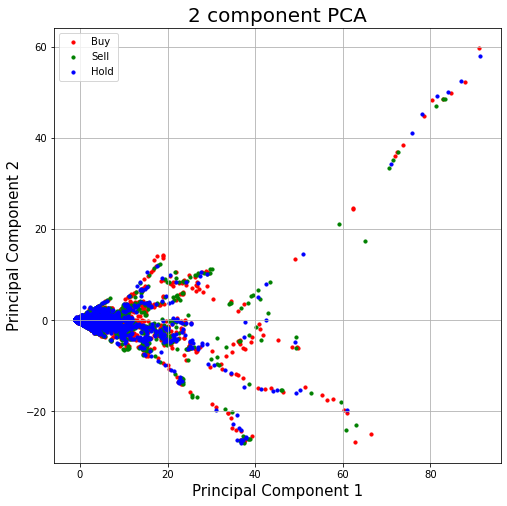

In [71]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Buy', 'Sell','Hold']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pcadf['target'] == target
    ax.scatter(pcadf.loc[indicesToKeep, 'principal component 1']
               , pcadf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [72]:
 kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [73]:
pcadf["kmean_target_numeric"]=kmeans.labels_

In [74]:
pcadf

,principal component 1,principal component 2,target_numeric,target,kmean_target_numeric
0,0.210449,0.043768,0,Buy,0
1,0.267291,0.050526,0,Buy,0
2,0.071494,-0.233925,0,Buy,0
3,0.126114,-0.227153,1,Sell,0
4,0.146986,-0.243517,2,Hold,0
...,...,...,...,...,...
58823,-1.039740,0.078976,1,Sell,0
58824,-1.039956,0.079430,0,Buy,0
58825,-1.037820,0.079236,0,Buy,0
58826,-1.034459,0.079764,0,Buy,0


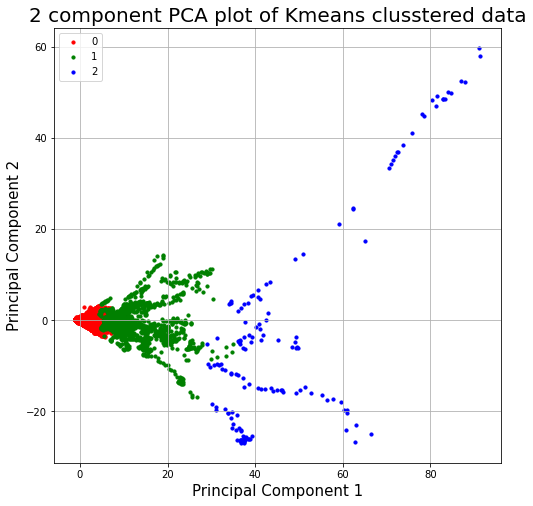

In [76]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA plot of Kmeans clusstered data', fontsize = 20)

targets = [0, 1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pcadf['kmean_target_numeric'] == target
    ax.scatter(pcadf.loc[indicesToKeep, 'principal component 1']
               , pcadf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()

In [77]:
correlation = pcadf["target_numeric"]. corr(pcadf["kmean_target_numeric"])

In [78]:
correlation

0.016179456580554825

# clusstering is not a solution here